<a href="https://colab.research.google.com/github/skhabiri/DS-Unit-4-Sprint-1-NLP/blob/main/module4-topic-modeling/LS_DS17_414_Topic_Modeling_Lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import gensim
import os
import re
from ast import literal_eval

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd
import tqdm

In [ ]:
df = pd.read_csv('./data/imbd_keywords.csv')

In [ ]:
df.head()

,review,sentiment,keywords
0,One of the other reviewers has mentioned that ...,positive,"['other shows', 'graphic violence', 'prison ex..."
1,A wonderful little production. The filming tec...,positive,"['halliwell', 'michael sheen', 'realism', 'com..."
2,I thought this was a wonderful way to spend ti...,positive,"['spirited young woman', 'devil wears prada', ..."
3,Basically there's a family where a little boy ...,negative,"['playing parents', 'jake', 'parents', 'descen..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"['mr. mattei', 'good luck', 'mattei', 'human r..."


In [ ]:
df.shape

(40436, 3)

In [ ]:
df['keywords'][0]

"['other shows', 'graphic violence', 'prison experience', 'prison bitches', 'violence', 'emerald city', 'dodgy dealings', 'glass fronts', 'inmates', 'street skills', 'unflinching scenes', 'crooked guards', 'the oswald maximum security state penitentary', 'mainstream audiences', 'oz', 'city', 'shady agreements', 'pretty pictures', 'touch', 'muslims', 'irish', 'italians', 'gangstas', 'latinos', 'christians', 'home', 'first', 'charm', 'the high levels', 'drugs', 'right', 'regards', 'well mannered, middle class inmates', 'sex', 'a show', 'scuffles', 'order', 'aryans', 'just 1 oz episode', 'the first episode', 'the other reviewers', 'your darker side', 'the prison', 'the main appeal', 'romance', 'the first thing', 'an experimental section', 'privacy', 'the classic use', 'the word', 'no punches', 'its brutality', 'their lack', 'a taste', 'the fact', 'the nickname', 'the agenda', 'all the cells', 'a nickel', 'you']"

In [ ]:
df['keywords'] = df['keywords'].apply(literal_eval)

In [ ]:
df['keywords'][0]

['other shows',
 'graphic violence',
 'prison experience',
 'prison bitches',
 'violence',
 'emerald city',
 'dodgy dealings',
 'glass fronts',
 'inmates',
 'street skills',
 'unflinching scenes',
 'crooked guards',
 'the oswald maximum security state penitentary',
 'mainstream audiences',
 'oz',
 'city',
 'shady agreements',
 'pretty pictures',
 'touch',
 'muslims',
 'irish',
 'italians',
 'gangstas',
 'latinos',
 'christians',
 'home',
 'first',
 'charm',
 'the high levels',
 'drugs',
 'right',
 'regards',
 'well mannered, middle class inmates',
 'sex',
 'a show',
 'scuffles',
 'order',
 'aryans',
 'just 1 oz episode',
 'the first episode',
 'the other reviewers',
 'your darker side',
 'the prison',
 'the main appeal',
 'romance',
 'the first thing',
 'an experimental section',
 'privacy',
 'the classic use',
 'the word',
 'no punches',
 'its brutality',
 'their lack',
 'a taste',
 'the fact',
 'the nickname',
 'the agenda',
 'all the cells',
 'a nickel',
 'you']

In [ ]:
df.head()

,review,sentiment,keywords
0,One of the other reviewers has mentioned that ...,positive,"[other shows, graphic violence, prison experie..."
1,A wonderful little production. The filming tec...,positive,"[halliwell, michael sheen, realism, comedy, wi..."
2,I thought this was a wonderful way to spend ti...,positive,"[spirited young woman, devil wears prada, summ..."
3,Basically there's a family where a little boy ...,negative,"[playing parents, jake, parents, descent dialo..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[mr. mattei, good luck, mattei, human relation..."


In [ ]:
stop_words = [
    'movie',
    'review',
    'film', 
    'actor',
    'actress',
    'films',
]

import spacy
nlp = spacy.load('en_core_web_lg')

In [ ]:
stops = nlp.Defaults.stop_words.union(stop_words)

In [ ]:
def remove_stops(_list_):
    """
    Remove stop words from a list of strings that contain multiple words (each row)
    """
    
    keywords = []
    
    # _list_ referes to one row in the df
    # keyword is a string phrase containing multiple words
    for keyword in _list_:
        
        phrase = []
        
        words = keyword.split()
        
        for word in words:
            if word in stops:
                pass
            else: 
                phrase.append(word)
            
        # join elements of phrase with ' 's
        phrase = ' '.join(phrase)
        
        # to exclude blanks
        if len(phrase) > 0:
            keywords.append(phrase)
    # keywords is a processed version of _list_
    return keywords
    

In [ ]:
from tqdm import tqdm

# instantiate tqdm 
tqdm.pandas()

df['clean_keywords'] = df['keywords'].progress_apply(remove_stops)

100%|██████████| 40436/40436 [00:03<00:00, 10583.84it/s]


In [ ]:
df['clean_keywords'][0]

['shows',
 'graphic violence',
 'prison experience',
 'prison bitches',
 'violence',
 'emerald city',
 'dodgy dealings',
 'glass fronts',
 'inmates',
 'street skills',
 'unflinching scenes',
 'crooked guards',
 'oswald maximum security state penitentary',
 'mainstream audiences',
 'oz',
 'city',
 'shady agreements',
 'pretty pictures',
 'touch',
 'muslims',
 'irish',
 'italians',
 'gangstas',
 'latinos',
 'christians',
 'home',
 'charm',
 'high levels',
 'drugs',
 'right',
 'regards',
 'mannered, middle class inmates',
 'sex',
 'scuffles',
 'order',
 'aryans',
 '1 oz episode',
 'episode',
 'reviewers',
 'darker',
 'prison',
 'main appeal',
 'romance',
 'thing',
 'experimental section',
 'privacy',
 'classic use',
 'word',
 'punches',
 'brutality',
 'lack',
 'taste',
 'fact',
 'nickname',
 'agenda',
 'cells',
 'nickel']

In [ ]:
import gensim
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore

In [ ]:
# Dict representation of all our keywords from the entire df column
# assign an id to each keyword string in alphabetical order
id2word = corpora.Dictionary(df['clean_keywords'])

In [ ]:
id2word[311]

'year later'

In [ ]:
id2word[0]

'1 oz episode'

In [ ]:
len(id2word)

491029

In [ ]:
len(df['clean_keywords'][0])

57

In [ ]:
len(df['clean_keywords'])

40436

In [ ]:
id2word.token2id['michael rooker']

555

In [ ]:
len(id2word.keys())

491029

In [ ]:
# exclude the keys that are repeated less than or more than a certain number of times
id2word.filter_extremes(no_below=15, no_above=0.85)

In [ ]:
len(id2word.keys())

10064

In [ ]:
# counts number of occurences based on the word ids
corpus = [id2word.doc2bow(text) for text in df['clean_keywords']]

In [ ]:
len(corpus)

40436

In [ ]:
id2word.token2id['shows']

29

In [ ]:
id2word[0]

'agenda'

In [ ]:
# assigns sequential ids to the keywords from first row on, and counts the number of occurences of the keyword in the same row.
# further occurences of the keyword in other rows will be given the same id as before
corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1)]

In [ ]:
# episode is repeated twice in this row, and it's id is borroed from row number 1
corpus[39080]

[(8, 2),
 (171, 1),
 (351, 1),
 (643, 1),
 (1112, 1),
 (1246, 1),
 (2052, 1),
 (3134, 1),
 (4987, 1),
 (6496, 1),
 (7023, 1),
 (9752, 1)]

In [ ]:
df['clean_keywords'][0]

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['shows',
 'graphic violence',
 'prison experience',
 'prison bitches',
 'violence',
 'emerald city',
 'dodgy dealings',
 'glass fronts',
 'inmates',
 'street skills',
 'unflinching scenes',
 'crooked guards',
 'oswald maximum security state penitentary',
 'mainstream audiences',
 'oz',
 'city',
 'shady agreements',
 'pretty pictures',
 'touch',
 'muslims',
 'irish',
 'italians',
 'gangstas',
 'latinos',
 'christians',
 'home',
 'charm',
 'high levels',
 'drugs',
 'right',
 'regards',
 'mannered, middle class inmates',
 'sex',
 'scuffles',
 'order',
 'aryans',
 '1 oz episode',
 'episode',
 'reviewers',
 'darker',
 'prison',
 'main appeal',
 'romance',
 'thing',
 'experimental section',
 'privacy',
 'classic use',
 'word',
 'punches',
 'brutality',
 'lack',
 'taste',
 'fact',
 'nickname',
 'agenda',
 'cells',
 'nickel']

In [ ]:
df['clean_keywords'][39080]

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['alias legend j.j. abrams',
 'legend j.j. abrams',
 'locke',
 'lockes little religious feud',
 'libby',
 'libbys deaths',
 'episode',
 'jack',
 'second season',
 'season',
 'ana-lucia',
 'final straw',
 'rodriguez & watros characters',
 'episode',
 'series',
 'deaths',
 'great series',
 'rodriguez & watros',
 'future',
 'end',
 'viewing']

In [ ]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   num_topics=20,
                   passes=50, 
                   workers=12
                  )

In [ ]:
lda.print_topics()

[(0,
  '0.010*"people" + 0.009*"time" + 0.009*"way" + 0.008*"war" + 0.007*"action" + 0.006*"end" + 0.006*"american" + 0.006*"fact" + 0.005*"world" + 0.005*"army"'),
 (1,
  '0.031*"series" + 0.028*"episode" + 0.015*"episodes" + 0.012*"time" + 0.012*"season" + 0.009*"characters" + 0.007*"shows" + 0.007*"disney" + 0.007*"people" + 0.007*"animation"'),
 (2,
  '0.011*"people" + 0.011*"time" + 0.008*"story" + 0.008*"scene" + 0.008*"fact" + 0.007*"characters" + 0.007*"acting" + 0.007*"money" + 0.006*"plot" + 0.006*"script"'),
 (3,
  '0.013*"time" + 0.011*"hollywood" + 0.009*"war" + 0.007*"story" + 0.006*"life" + 0.006*"german" + 0.006*"oscar" + 0.006*"years" + 0.005*"history" + 0.005*"russian"'),
 (4,
  '0.009*"time" + 0.008*"people" + 0.007*"guy" + 0.007*"lot" + 0.006*"scene" + 0.006*"thing" + 0.006*"end" + 0.006*"story" + 0.006*"point" + 0.006*"things"'),
 (5,
  '0.012*"story" + 0.010*"life" + 0.008*"characters" + 0.007*"time" + 0.007*"way" + 0.007*"american" + 0.007*"love" + 0.007*"directo

In [ ]:
lda.print_topics(2)

[(0,
  '0.010*"people" + 0.009*"time" + 0.009*"way" + 0.008*"war" + 0.007*"action" + 0.006*"end" + 0.006*"american" + 0.006*"fact" + 0.005*"world" + 0.005*"army"'),
 (8,
  '0.026*"kids" + 0.014*"time" + 0.014*"children" + 0.012*"fun" + 0.010*"lot" + 0.009*"adults" + 0.008*"jokes" + 0.008*"parents" + 0.008*"way" + 0.007*"things"')]

In [ ]:
import re

In [ ]:
test = lda.print_topics(1)
test

[(3,
  '0.013*"time" + 0.011*"hollywood" + 0.009*"war" + 0.007*"story" + 0.006*"life" + 0.006*"german" + 0.006*"oscar" + 0.006*"years" + 0.005*"history" + 0.005*"russian"')]

In [ ]:
test[0][1]

'0.013*"time" + 0.011*"hollywood" + 0.009*"war" + 0.007*"story" + 0.006*"life" + 0.006*"german" + 0.006*"oscar" + 0.006*"years" + 0.005*"history" + 0.005*"russian"'

In [ ]:
re.findall(r'"[^"]*"', test[0][1])

['"time"',
 '"hollywood"',
 '"war"',
 '"story"',
 '"life"',
 '"german"',
 '"oscar"',
 '"years"',
 '"history"',
 '"russian"']

In [ ]:
# t[1] exclude the topic number from each tuple
# r'"[^"]*"' grab every instance of the patterns between " and "

words = [re.findall(r'"[^"]*"', t[1]) for t in lda.print_topics(20)]

In [ ]:
words[0]

['"people"',
 '"time"',
 '"way"',
 '"war"',
 '"action"',
 '"end"',
 '"american"',
 '"fact"',
 '"world"',
 '"army"']

In [ ]:
# number of topics
len(words)

20

In [ ]:
# t refers to each of 20 topics, grab the first 5 keywords in each topic
topic_labels = [', '.join(t[0:5]) for t in words]

In [ ]:
for id, t in enumerate(topic_labels): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
"people", "time", "way", "war", "action"

------ Topic 1 ------
"series", "episode", "episodes", "time", "season"

------ Topic 2 ------
"people", "time", "story", "scene", "fact"

------ Topic 3 ------
"time", "hollywood", "war", "story", "life"

------ Topic 4 ------
"time", "people", "guy", "lot", "scene"

------ Topic 5 ------
"story", "life", "characters", "time", "way"

------ Topic 6 ------
"time", "sci-fi", "special effects", "acting", "story"

------ Topic 7 ------
"people", "life", "family", "story", "mother"

------ Topic 8 ------
"kids", "time", "children", "fun", "lot"

------ Topic 9 ------
"plot", "people", "end", "time", "acting"

------ Topic 10 ------
"characters", "story", "character", "plot", "end"

------ Topic 11 ------
"people", "time", "acting", "plot", "money"

------ Topic 12 ------
"time", "man", "wife", "husband", "way"

------ Topic 13 ------
"time", "movies", "people", "start", "finish"

------ Topic 14 ------
"british", "time", "stor

In [ ]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Lambda 0 shows the unique representative keywords of a topic
# Lambda=1 shows the most probable keyword showing in a topic
pyLDAvis.gensim.prepare(lda, corpus, id2word)

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
corpus[0]

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1)]

In [ ]:
# estimated percentage of topics that exist in each document
lda[corpus[0]]

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 0.20861204),
 (1, 0.1258388),
 (5, 0.35511088),
 (7, 0.2106045),
 (8, 0.078962564)]

In [ ]:
distro = [lda[doc] for doc in corpus]

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
distro[0]

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 0.20861584),
 (1, 0.12584664),
 (5, 0.35521033),
 (7, 0.21061157),
 (8, 0.07884438)]

In [ ]:
def update(doc):
    # fills all the irrelevant topic keys for document doc with 0 distribution probability
    d_dist = {k:0 for k in range(0,20)}
    for t in doc:
        #update topic # t[0] key with t[1] value
        d_dist[t[0]] = t[1]
    return d_dist

new_distro = [update(doc) for doc in distro] 

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# .from_records Creates a DataFrame object from a structured ndarray, sequence of tuples or dicts, or DataFrame
topics = pd.DataFrame.from_records(new_distro)
topics.head()

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.208616,0.125847,0.000000,0.000000,0.0,0.355210,0.000000,0.210612,0.078844,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000
1,0.000000,0.000000,0.000000,0.284714,0.0,0.220674,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.176071,0.168162,0.110878,0.000000,0.0,0.00000
2,0.000000,0.000000,0.247494,0.000000,0.0,0.000000,0.000000,0.000000,0.116592,0.0,0.260348,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.094215,0.0,0.23721
3,0.094710,0.000000,0.000000,0.000000,0.0,0.000000,0.321439,0.518422,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000
4,0.000000,0.000000,0.255181,0.000000,0.0,0.408196,0.222810,0.000000,0.000000,0.0,0.000000,0.0,0.087126,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000


In [ ]:
topics.columns = topic_labels
print(topics.shape)
topics.head()

(40436, 20)


/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,"""people"", ""time"", ""way"", ""war"", ""action""","""series"", ""episode"", ""episodes"", ""time"", ""season""","""people"", ""time"", ""story"", ""scene"", ""fact""","""time"", ""hollywood"", ""war"", ""story"", ""life""","""time"", ""people"", ""guy"", ""lot"", ""scene""","""story"", ""life"", ""characters"", ""time"", ""way""","""time"", ""sci-fi"", ""special effects"", ""acting"", ""story""","""people"", ""life"", ""family"", ""story"", ""mother""","""kids"", ""time"", ""children"", ""fun"", ""lot""","""plot"", ""people"", ""end"", ""time"", ""acting""","""characters"", ""story"", ""character"", ""plot"", ""end""","""people"", ""time"", ""acting"", ""plot"", ""money""","""time"", ""man"", ""wife"", ""husband"", ""way""","""time"", ""movies"", ""people"", ""start"", ""finish""","""british"", ""time"", ""story"", ""movies"", ""dvd""","""characters"", ""people"", ""actors"", ""story"", ""acting""","""story"", ""people"", ""way"", ""time"", ""book""","""story"", ""plot"", ""role"", ""fact"", ""case""","""french"", ""american"", ""story"", ""italian"", ""english""","""role"", ""cast"", ""plot"", ""music"", ""story"""
0,0.208616,0.125847,0.000000,0.000000,0.0,0.355210,0.000000,0.210612,0.078844,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000
1,0.000000,0.000000,0.000000,0.284714,0.0,0.220674,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.176071,0.168162,0.110878,0.000000,0.0,0.00000
2,0.000000,0.000000,0.247494,0.000000,0.0,0.000000,0.000000,0.000000,0.116592,0.0,0.260348,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.094215,0.0,0.23721
3,0.094710,0.000000,0.000000,0.000000,0.0,0.000000,0.321439,0.518422,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000
4,0.000000,0.000000,0.255181,0.000000,0.0,0.408196,0.222810,0.000000,0.000000,0.0,0.000000,0.0,0.087126,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000


In [ ]:
# find the index on axis=1 where the value in the row is max
df['primary_topic'] = topics.idxmax(axis=1)

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review,sentiment,keywords,clean_keywords,primary_topic
0,One of the other reviewers has mentioned that ...,positive,"[other shows, graphic violence, prison experie...","[shows, graphic violence, prison experience, p...","""story"", ""life"", ""characters"", ""time"", ""way"""
1,A wonderful little production. The filming tec...,positive,"[halliwell, michael sheen, realism, comedy, wi...","[halliwell, michael sheen, realism, comedy, wi...","""time"", ""hollywood"", ""war"", ""story"", ""life"""
2,I thought this was a wonderful way to spend ti...,positive,"[spirited young woman, devil wears prada, summ...","[spirited young woman, devil wears prada, summ...","""characters"", ""story"", ""character"", ""plot"", ""end"""
3,Basically there's a family where a little boy ...,negative,"[playing parents, jake, parents, descent dialo...","[playing parents, jake, parents, descent dialo...","""people"", ""life"", ""family"", ""story"", ""mother"""
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[mr. mattei, good luck, mattei, human relation...","[mr. mattei, good luck, mattei, human relation...","""story"", ""life"", ""characters"", ""time"", ""way"""


In [ ]:
df['primary_topic'].value_counts()

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"people", "time", "acting", "plot", "money"               4124
"story", "life", "characters", "time", "way"              3100
"people", "life", "family", "story", "mother"             2888
"characters", "people", "actors", "story", "acting"       2612
"plot", "people", "end", "time", "acting"                 2578
"story", "people", "way", "time", "book"                  2530
"time", "sci-fi", "special effects", "acting", "story"    2390
"time", "people", "guy", "lot", "scene"                   1958
"kids", "time", "children", "fun", "lot"                  1940
"characters", "story", "character", "plot", "end"         1939
"people", "time", "way", "war", "action"                  1902
"people", "time", "story", "scene", "fact"                1779
"time", "man", "wife", "husband", "way"                   1549
"series", "episode", "episodes", "time", "season"         1504
"british", "time", "story", "movies", "dvd"               1472
"role", "cast", "plot", "music", "story"               

In [ ]:
df.head()

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review,sentiment,keywords,clean_keywords,primary_topic
0,One of the other reviewers has mentioned that ...,positive,"[other shows, graphic violence, prison experie...","[shows, graphic violence, prison experience, p...","""story"", ""life"", ""characters"", ""time"", ""way"""
1,A wonderful little production. The filming tec...,positive,"[halliwell, michael sheen, realism, comedy, wi...","[halliwell, michael sheen, realism, comedy, wi...","""time"", ""hollywood"", ""war"", ""story"", ""life"""
2,I thought this was a wonderful way to spend ti...,positive,"[spirited young woman, devil wears prada, summ...","[spirited young woman, devil wears prada, summ...","""characters"", ""story"", ""character"", ""plot"", ""end"""
3,Basically there's a family where a little boy ...,negative,"[playing parents, jake, parents, descent dialo...","[playing parents, jake, parents, descent dialo...","""people"", ""life"", ""family"", ""story"", ""mother"""
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[mr. mattei, good luck, mattei, human relation...","[mr. mattei, good luck, mattei, human relation...","""story"", ""life"", ""characters"", ""time"", ""way"""


In [ ]:
# Count number of reviews for each primary_topic that are labeled negative and positive
agg = pd.pivot_table(df, values=['review'], 
                     index=['primary_topic'], 
                     columns=['sentiment'], aggfunc='count')

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
agg.head(2)

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


review         
sentiment                                          negative positive
primary_topic                                                       
"british", "time", "story", "movies", "dvd"             628      844
"characters", "people", "actors", "story", "act...     1183     1429
"characters", "story", "character", "plot", "end"       870     1069
"french", "american", "story", "italian", "engl...      384      744
"kids", "time", "children", "fun", "lot"                738     1202

In [ ]:
agg = agg.reset_index()

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
agg.head(2)

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


primary_topic   review         
sentiment                                                    negative positive
0                "british", "time", "story", "movies", "dvd"      628      844
1          "characters", "people", "actors", "story", "ac...     1183     1429

In [ ]:
agg.columns = ['primary_topic', 'negative', 'positive']
agg.head(2)

/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,primary_topic,negative,positive
0,"""british"", ""time"", ""story"", ""movies"", ""dvd""",628,844
1,"""characters"", ""people"", ""actors"", ""story"", ""ac...",1183,1429


/Users/shahnam/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


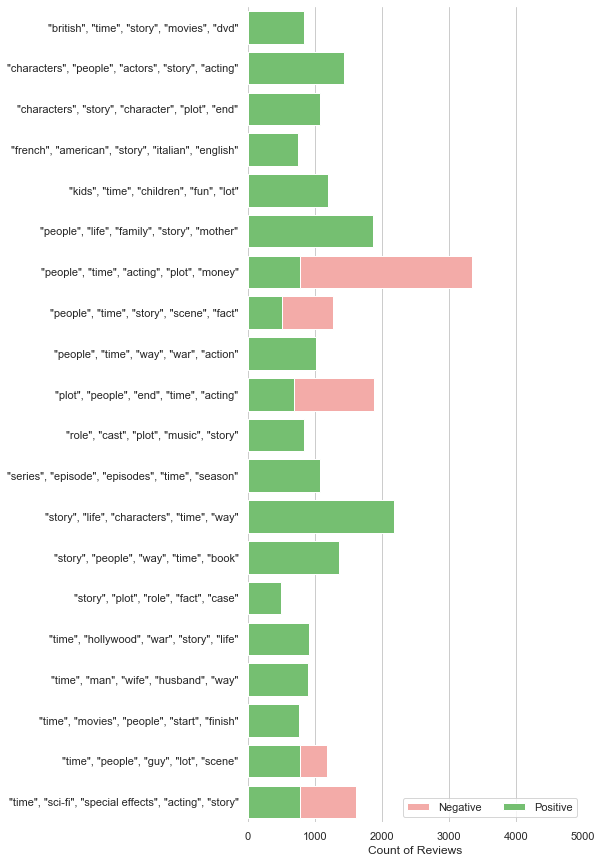

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes('pastel')
sns.barplot(x='negative', y='primary_topic', data=agg, label="Negative", color="r")

sns.set_color_codes('muted')
sns.barplot(x='positive', y='primary_topic', data=agg, label="Positive", color="g")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,5000), ylabel="", xlabel="Count of Reviews")
sns.despine(left=True, bottom=True)